In [3]:
import csv
import os

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# <b> Specify each path

In [4]:
dataset = 'new_keypoint_2.csv'
model_save_path = 'keypoint_classifier_demo_2.keras'
tflite_save_path = 'keypoint_classifier_demo_2.tflite'
label_file_path = 'keypoint_classifier_label_2.csv'
# Function to check if a file exists
def check_file_path(file_path):
    if os.path.exists(file_path):
        if os.path.isfile(file_path):
            print(f"File exists: {file_path}")
        else:
            print(f"Path exists, but it's not a file: {file_path}")
    else:
        print(f"File does not exist: {file_path}")

# Check each file
check_file_path(dataset)
check_file_path(model_save_path)
check_file_path(tflite_save_path)
check_file_path(label_file_path)


File exists: new_keypoint_2.csv
File exists: keypoint_classifier_demo_2.keras
File exists: keypoint_classifier_demo_2.tflite
File exists: keypoint_classifier_label_2.csv


# <b> Set Number Of Classes

In [5]:
df = pd.read_csv(label_file_path, header=None)
num_classes= len(df)
num_classes

6

# <b> Dataset reading

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype=np.float32, skiprows=1, usecols=list(range(1, (21*2)+1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype=np.int32, skiprows=1, usecols=(0))

In [ ]:
X_dataset

array([[ 0.        ,  0.        , -0.32467532, ..., -0.6103896 ,
         0.15584415, -0.5064935 ],
       [ 0.        ,  0.        , -0.32051283, ..., -0.5769231 ,
         0.12820514, -0.5       ],
       [ 0.        ,  0.        , -0.32051283, ..., -0.5769231 ,
         0.12820514, -0.5       ],
       ...,
       [ 0.        ,  0.        , -0.32954547, ..., -0.6363636 ,
         0.04545455, -0.5568182 ],
       [ 0.        ,  0.        , -0.3218391 , ..., -0.7241379 ,
         0.04597701, -0.62068963],
       [ 0.        ,  0.        , -0.27631578, ..., -0.7105263 ,
         0.09210526, -0.6315789 ]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.25, random_state=42)

# <b> Model building

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,136 (4.44 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import graphviz
print(graphviz.__version__)
import pydot
print(pydot.__version__)



0.20.3
3.0.3


In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
hist = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, early_stopping]
)

Epoch 1/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 26s 868ms/step - accuracy: 0.0938 - loss: 1.9565
Epoch 1: saving model to keypoint_classifier_demo_2.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1595 - loss: 1.8482 - val_accuracy: 0.3448 - val_loss: 1.7389
Epoch 2/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2188 - loss: 1.7597
Epoch 2: saving model to keypoint_classifier_demo_2.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2359 - loss: 1.7613 - val_accuracy: 0.4455 - val_loss: 1.6982
Epoch 3/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.2578 - loss: 1.7132
Epoch 3: saving model to keypoint_classifier_demo_2.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2577 - loss: 1.7241 - val_accuracy: 0.4546 - val_loss: 1.6415
Epoch 4/1000
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2578 - loss: 1.7160
Epoch 4: saving model to keypoint_classifier_demo_2.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2983 - loss: 1.6820 

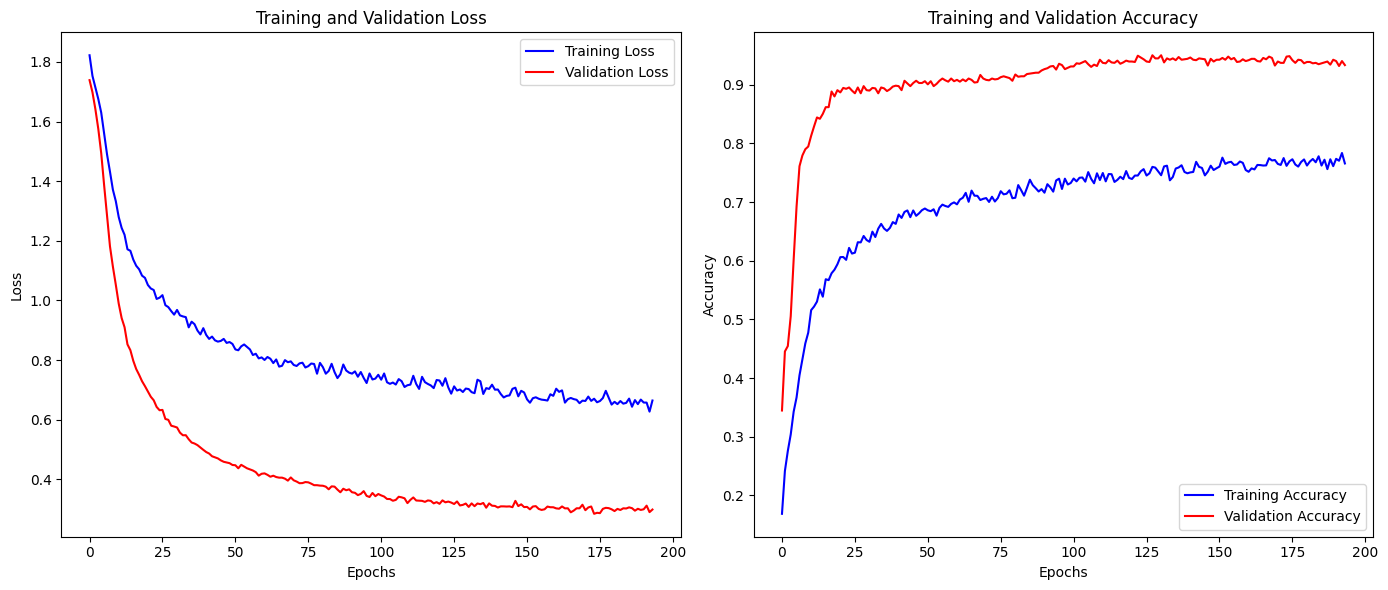

In [ ]:
# Extract accuracy and loss data from the training history
history_dict = hist.history

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the training and validation loss
ax[0].plot(history_dict['loss'], label='Training Loss', color='blue')
ax[0].plot(history_dict['val_loss'], label='Validation Loss', color='red')
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the training and validation accuracy
ax[1].plot(history_dict['accuracy'], label='Training Accuracy', color='blue')
ax[1].plot(history_dict['val_accuracy'], label='Validation Accuracy', color='red')
ax[1].set_title('Training and Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
# # Model evaluation
# val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9415 - loss: 0.2883 


In [ ]:
# # Loading the saved model
# model = tf.keras.models.load_model(model_save_path)

In [ ]:
# # Inference test
# predict_result = model.predict(np.array([X_test[0]]))
# print(np.squeeze(predict_result))
# print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[5.6749169e-04 4.5748970e-06 4.1147061e-03 8.8973325e-01 9.6305974e-02
 9.2740590e-03]
3


# <b> Confusion matrix

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step


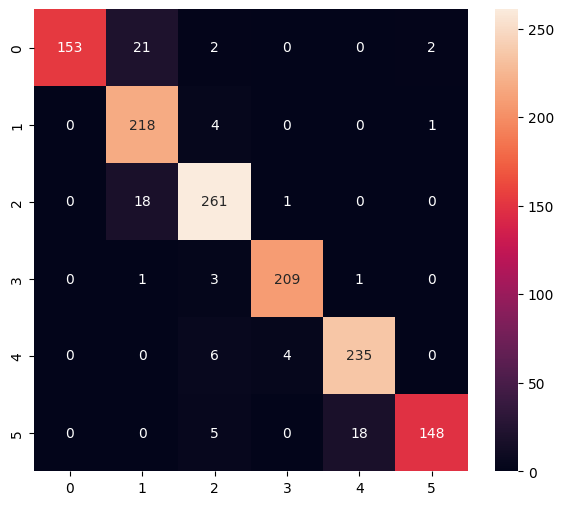

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.86      0.92       178
           1       0.84      0.98      0.91       223
           2       0.93      0.93      0.93       280
           3       0.98      0.98      0.98       214
           4       0.93      0.96      0.94       245
           5       0.98      0.87      0.92       171

    accuracy                           0.93      1311
   macro avg       0.94      0.93      0.93      1311
weighted avg       0.94      0.93      0.93      1311



In [ ]:
# def print_confusion_matrix(y_true, y_pred, report=True):
#     labels = sorted(list(set(y_true)))
#     cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
#     df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
#     fig, ax = plt.subplots(figsize=(7, 6))
#     sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
#     ax.set_ylim(len(set(y_true)), 0)
#     plt.show()
    
#     if report:
#         print('Classification Report')
#         print(classification_report(y_test, y_pred))

# Y_pred = model.predict(X_test)
# y_pred = np.argmax(Y_pred, axis=1)

# print_confusion_matrix(y_test, y_pred)

# <b> Convert to model for Tensorflow-Lite

In [ ]:
# model.save(model_save_path, include_optimizer=False)
# model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_16 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,410 (13.32 KB)

 Trainable params: 1,136 (4.44 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,274 (8.89 KB)

In [ ]:
# # Transform model (quantization)

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_quantized_model = converter.convert()

# open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\dangq\AppData\Local\Temp\tmp9o9kgad8\assets


INFO:tensorflow:Assets written to: C:\Users\dangq\AppData\Local\Temp\tmp9o9kgad8\assets


Saved artifact at 'C:\Users\dangq\AppData\Local\Temp\tmp9o9kgad8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_8')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  1837101914720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1837101912432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1837101800560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1837101797568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1837101795104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1837101793872: TensorSpec(shape=(), dtype=tf.resource, name=None)


6644

# <b> Inference test

In [ ]:
# interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
# interpreter.allocate_tensors()

In [ ]:
# # Get I / O tensor
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

In [ ]:
# print('Input details: \n',input_details)
# print('\n')
# print('Onput details: \n',output_details)

Input details: 
 [{'name': 'serving_default_input_layer_8:0', 'index': 0, 'shape': array([ 1, 42]), 'shape_signature': array([-1, 42]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


Onput details: 
 [{'name': 'StatefulPartitionedCall_1:0', 'index': 10, 'shape': array([1, 6]), 'shape_signature': array([-1,  6]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
# interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
# %%time
# # Inference implementation
# interpreter.invoke()
# tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
# print(np.squeeze(tflite_results))
# print(np.argmax(np.squeeze(tflite_results)))

[5.6749140e-04 4.5748925e-06 4.1147023e-03 8.8973325e-01 9.6305951e-02
 9.2740580e-03]
3
